# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

**Trees are built when we split the data into smaller and smaller groups, learning the features that best separate our information into clean partitions. Each 'branching off' represents a clean split in categorization of variables.**

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

**Trees are great for handling any kind of relationship between variables as they split the data into separate chunks without making any assumptions of linearity about relationships. Linear models, on the other hand, try to fit data to a straight line, which doesn't always work for more complex curves.**

3. Why is the Gini a good loss function for categorical target variables?

**The gini loss function measures how mixed categories are within a group. In trees, we want to make each defined group as pure as possible, so by using Gini we can create clean, meaningful categories.**

4. Why do trees tend to overfit, and how can this tendency be constrained?

**Trees tend to overfit by splitting over and over, and ending up with too many branches, capturing even noise. If we want to constrain this, we can limit the depth of the tree, set a minimum number of samples per split, or prune off branches that are too specific.**

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

**False. Trees work in numerical as well as categorical variables. They can create plenty of branches, regardless of the number of features.**

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

**Having only binary splits from the tree simplifies the process by making it more step-by-step, rather than trying to figure out everything at once. It also allows us to explore different combinations of branches more effectively.**

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

**If a tree is very, very deep with a lot of tiny branches, it's likely overfitting, while if it's very shallow without many branches at all, it's likely underfitting.**

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

In [1]:
! git clone https://github.com/ds4e/trees

Cloning into 'trees'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 119 (delta 14), reused 5 (delta 5), pack-reused 102 (from 1)
Receiving objects: 100% (119/119), 74.45 MiB | 13.87 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [2]:
#1
import pandas as pd
cars = pd.read_csv('/content/trees/assignment/data/cars_hw.csv')
print("Shape:", cars.shape)
print("Columns:", cars.columns.tolist())
cars.head()
print('976 observations, 12 variables (really 11 becauseone is an index, so 10 covariates)')

Shape: (976, 12)
Columns: ['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run', 'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Price']
976 observations, 12 variables (really 11 becauseone is an index, so 10 covariates)


In [3]:
#2
from sklearn.model_selection import train_test_split

cars = cars.drop(columns=['Unnamed: 0']) #drop index column

categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numeric_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']

cars_dummies = pd.get_dummies(cars[categorical_vars], drop_first=True)

X = pd.concat([cars_dummies, cars[numeric_vars]], axis=1)

y = cars['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Looks like a min_samples_leaf of 5 achieves the best R², coming in at 0.8253!


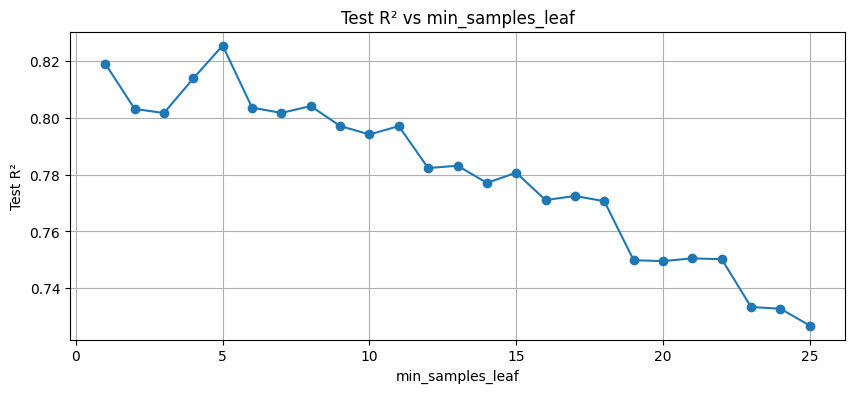

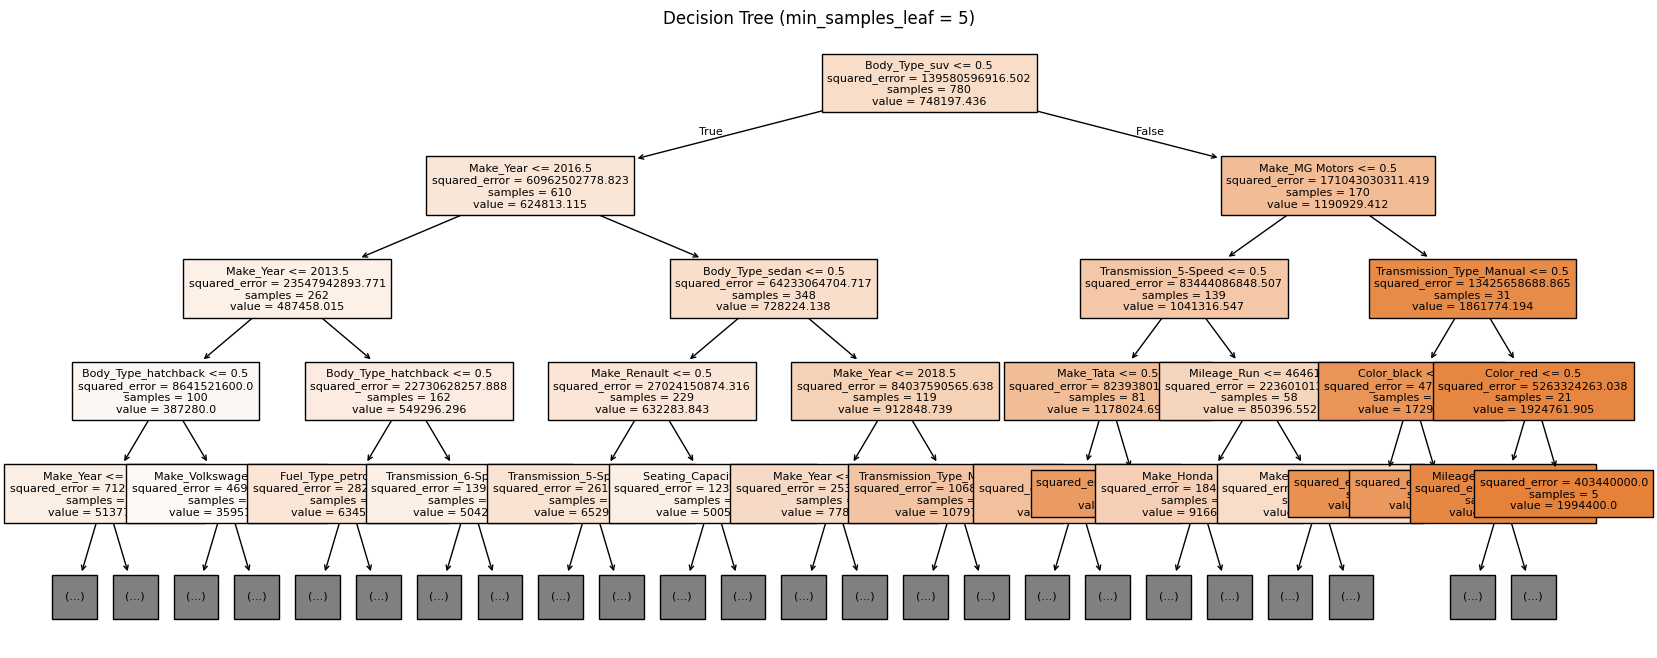

In [4]:
#3
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

r2_scores = []

# try 1 to 25
for leaf_size in range(1, 26):
    tree = DecisionTreeRegressor(min_samples_leaf=leaf_size, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# find min_samples_leaf
best_leaf = range(1, 26)[r2_scores.index(max(r2_scores))]
print(f"Looks like a min_samples_leaf of {best_leaf} achieves the best R², coming in at {max(r2_scores):.4f}!")

# plot r2 scores
plt.figure(figsize=(10, 4))
plt.plot(range(1, 26), r2_scores, marker='o')
plt.xlabel("min_samples_leaf")
plt.ylabel("Test R²")
plt.title("Test R² vs min_samples_leaf")
plt.grid(True)
plt.show()

# best tree
best_tree = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
best_tree.fit(X_train, y_train)

plt.figure(figsize=(20, 8))
plot_tree(best_tree, max_depth=4, feature_names=X.columns, filled=True, fontsize=8)
plt.title(f"Decision Tree (min_samples_leaf = {best_leaf})")
plt.show()

Test R²: 0.8253
Test RMSE: 141536.54


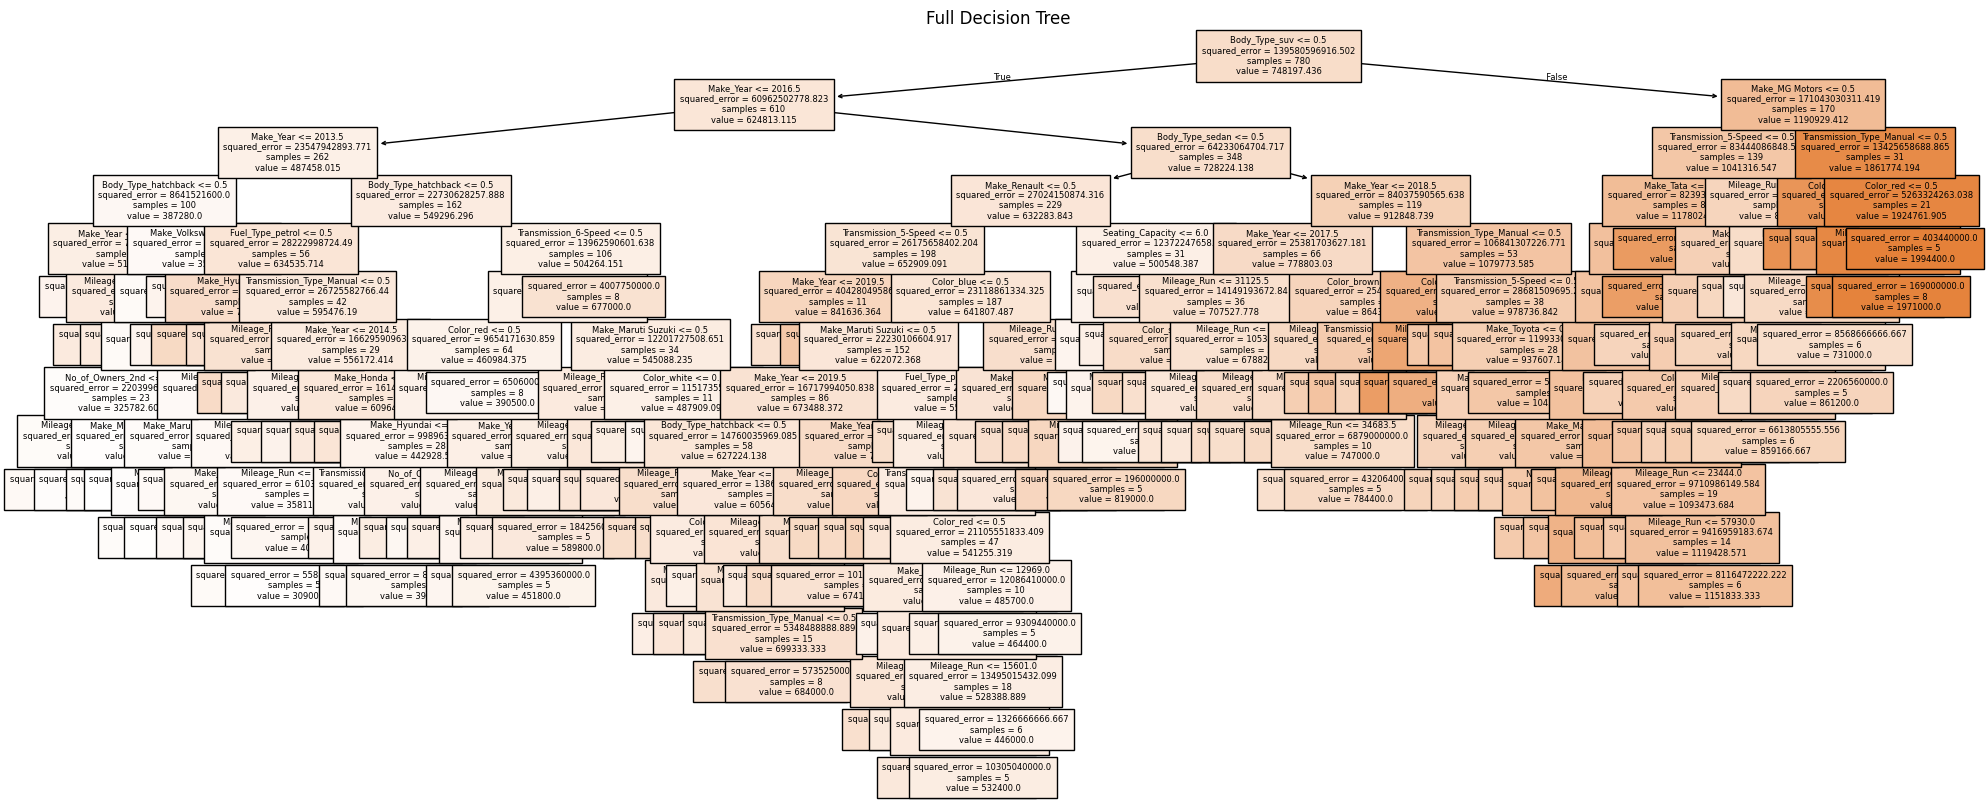

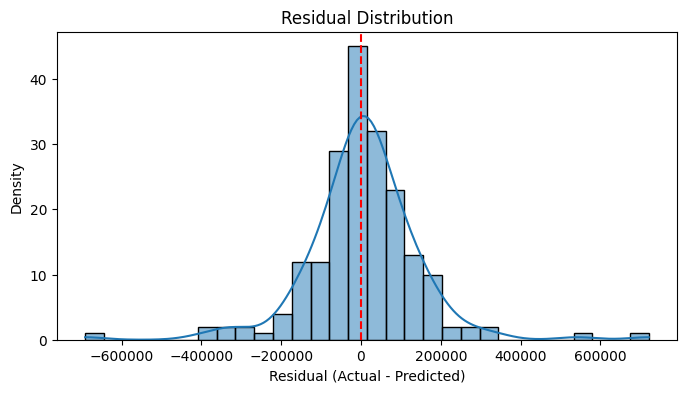

The residual distribution is indeed centered near 0, and is pretty symmetric, which means there isn't a strong bias, and the errors are balanced.


In [6]:
#4
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

final_tree = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=42)
final_tree.fit(X_train, y_train)
y_pred = final_tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R²: {r2:.4f}")
print(f"Test RMSE: {rmse:.2f}")

plt.figure(figsize=(24, 10))
plot_tree(final_tree, feature_names=X.columns, filled=True, fontsize=6)
plt.title("Full Decision Tree")
plt.show()

residuals = y_test - y_pred

plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.title("Residual Distribution")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Density")
plt.show()

print('The residual distribution is indeed centered near 0, and is pretty symmetric, which means there isn\'t a strong bias, and the errors are balanced.')

In [7]:
#5
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred_lin = linreg.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print(f"Linear Regression Test R²: {r2_lin:.4f}")
print(f"Linear Regression Test RMSE: {rmse_lin:.2f}")
print('So, Linear Regression has a slightly lower R² and a slightly higher RMSE, meaning it performs sliglty worse than the tree.')

Linear Regression Test R²: 0.8203
Linear Regression Test RMSE: 143575.20


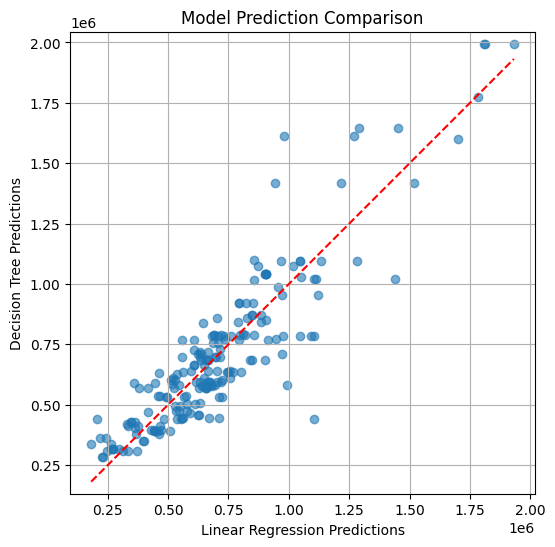

Most points stay on the line near the beginning, so they agree in that sense. However, there are some big outliarsin the middle, so the models disagree for these points.


In [9]:
#6
plt.figure(figsize=(6, 6))
plt.scatter(y_pred_lin, y_pred, alpha=0.6)
plt.plot([y_pred_lin.min(), y_pred_lin.max()], [y_pred_lin.min(), y_pred_lin.max()], color='red', linestyle='--')
plt.xlabel("Linear Regression Predictions")
plt.ylabel("Decision Tree Predictions")
plt.title("Model Prediction Comparison")
plt.grid(True)
plt.axis("equal")
plt.show()
print('Most points stay on the line near the beginning, so they agree in that sense. However, there are some big outliarsin the middle, so the models disagree for these points.')

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?